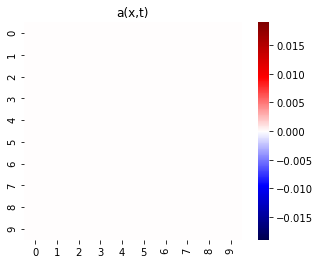

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import LineCollection

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))

fig = plt.figure()

x = np.linspace(0,5,1)
y = np.linspace(0,5,1)

plt.gca().invert_yaxis()

x,y = np.meshgrid(x,y)
 
x_end = 5
xticks = np.arange(x_end+1)
yticks = np.linspace(-2.5,2.5,11)

Max = 0.019

data = []
with open("null.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data1 = []
with open("cos (m = 8, R1 = 1, L1 = 1).txt") as f:
    for line in f:
        data1.append([float(x) for x in line.split()])
data2 = []
with open("sin (m = 8, R1 = 1, L1 = 1).txt") as f:
    for line in f:
        data2.append([float(x) for x in line.split()])
for i in range(0,101):
    for j in range(0,101):
        data[j][i] = data1[j][i] + data2[j][i]
sns.heatmap(data, square=True, vmin = -Max, vmax = Max, cmap = "seismic")


def init():
      sns.heatmap(np.zeros((10, 10)), square=True, cbar=False, vmin = -Max, vmax = Max, cmap = "seismic")

def animate(i):
    data = []
    with open("null.txt") as f:
        for line in f:
            data.append([float(x) for x in line.split()])
    data1 = []
    with open("cos (m = 8, R1 = 1, L1 = 1).txt") as f:
        for line in f:
            data1.append([float(x) for x in line.split()])
    data2 = []
    with open("sin (m = 8, R1 = 1, L1 = 1).txt") as f:
        for line in f:
            data2.append([float(x) for x in line.split()])
    for k1 in range(0,101):
        for k2 in range(0,101):
            data[k2][k1] = data1[k2][k1]*np.cos(2*np.pi*i/20) + data2[k2][k1]*np.sin(2*np.pi*i/20)
    ax = sns.heatmap(data, square=True, cbar=False, vmin = -Max, vmax = Max, xticklabels=xticks, yticklabels=yticks, cmap="seismic")
    ax.set_title('a(x,t)')
    ax.set_ylabel('z, m')
    ax.set_xlabel('rho, m')
    ax.set_xticks(xticks*(ax.get_xlim()[1] - 0.5)/5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks((yticks + 2.5)*(ax.get_xlim()[1])/5)
    ax.invert_yaxis()
    R1 = 1
    L1 = 1
    lines = [[(0, 50 + L1*10), (R1*20, 50 + L1*10)], [(R1*20, 50 + L1*10), (R1*20, 50 - L1*10)], [(R1*20, 50 - L1*10), (0, 50 - L1*10)]]
    lc = LineCollection(lines, linewidths=(2,2,2), colors=['black', 'black', 'black'])
    ax.add_collection(lc)
    ax.autoscale()
    
    

    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)
anim.save('animation (m = 8, R1 = 1, L1 = 1).gif',writer='imagemagick',fps=20)
